# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse,r2_score
import math

from tensorflow import keras

# Reading the Excel File

In [2]:
data = pd.read_excel('../data/Processed_data.xlsx') 
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data = data.drop(data[(data['NOx Mass']<0) | (data['Eng. Speed']<0) | (data['Roll Speed']<0)].index)
data = data.drop(data[(data['CO Mass']==0)].index)
data.isnull().sum(),data.shape

(Test Time         0
 Roll Speed        0
 Eng. Speed        0
 CO Mass           0
 NOx Mass          0
 CO2 Mass          0
 driving cycle     0
 Vehicle           0
 dtype: int64,
 (74176, 8))

In [4]:
data.to_excel('../data/Processed_data_noZero.xlsx')
data.to_csv('../data/Processed_data_noZero.csv')

In [5]:
data.describe()

,Test Time,Roll Speed,Eng. Speed,CO Mass,NOx Mass,CO2 Mass,Vehicle
count,74176.000000,7.417600e+04,74176.000000,7.417600e+04,7.417600e+04,74176.000000,74176.000000
mean,7108.624590,3.775808e+01,1296.418358,6.747405e-03,4.757227e-03,2.190542,3.434925
std,4088.920177,3.347045e+01,1081.842152,4.681529e-02,9.272865e-03,2.164275,1.709246
min,0.100000,1.881270e-07,0.042635,2.633260e-10,9.261210e-10,0.000649,1.000000
25%,3514.100000,9.896497e+00,730.810000,1.732927e-05,4.306815e-05,0.658664,2.000000
50%,7127.600000,3.126160e+01,1193.330000,5.701690e-05,1.269605e-03,1.374640,4.000000
75%,10737.350000,5.195493e+01,1807.557500,6.606997e-04,5.794280e-03,3.085600,5.000000
max,14018.100000,1.170090e+02,20693.200000,1.464500e+00,1.859920e-01,18.684400,6.000000


<AxesSubplot:>

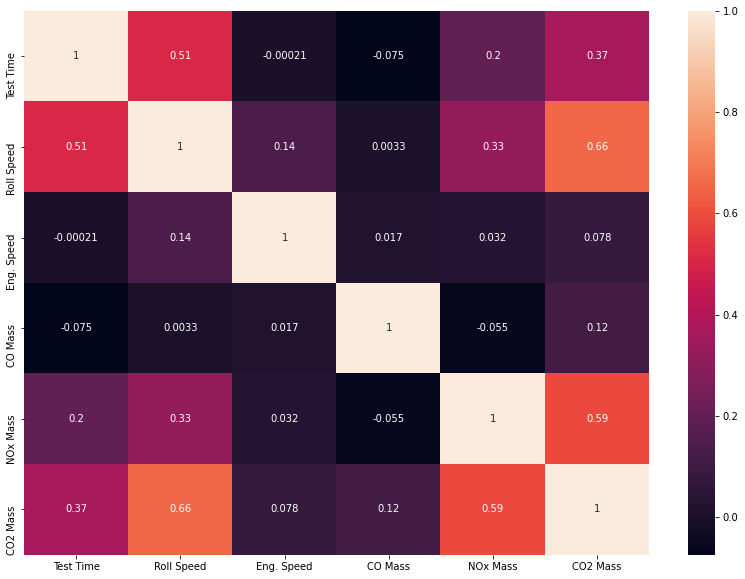

In [6]:
corr = data.drop(['Vehicle'],axis=1).corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr,annot=True)

<AxesSubplot:>

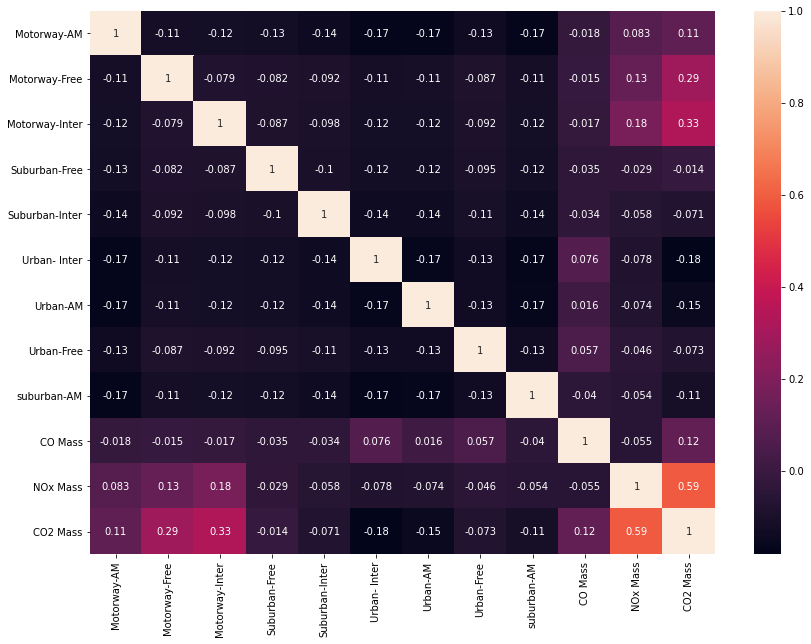

In [7]:
x = pd.get_dummies(data['driving cycle '])
foo = pd.concat([x,data[['CO Mass','NOx Mass','CO2 Mass']]],axis=1)
cor = foo.corr()
plt.figure(figsize=(14,10))
sns.heatmap(cor,annot=True)